In [23]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, SimpleRNN

In [2]:
num_words = 10000
max_length = 200

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)
X_train = pad_sequences(X_train, maxlen=max_length)
X_test = pad_sequences(X_test, maxlen=max_length)

In [24]:
RNN_Model = Sequential()
RNN_Model.add(Embedding(input_dim=num_words, output_dim=128, input_length=max_length))
RNN_Model.add(SimpleRNN(64))
RNN_Model.add(Dense(1, activation='sigmoid'))  # Sigmoid activation for binary classification

RNN_Model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
# LSTM model
LSTM_Model = Sequential()
LSTM_Model.add(Embedding(input_dim=num_words, output_dim=128, input_length=max_length))
LSTM_Model.add(LSTM(64))
LSTM_Model.add(Dense(1, activation='sigmoid'))

LSTM_Model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
# GRU model
GRU_Model = Sequential()
GRU_Model.add(Embedding(input_dim=num_words, output_dim=128, input_length=max_length))
GRU_Model.add(GRU(64))
GRU_Model.add(Dense(1, activation='sigmoid'))

GRU_Model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
LSTM_history = LSTM_Model.fit(X_train, y_train, validation_split=0.2, epochs=5, batch_size=64)

Epoch 1/5
313/313 [==============================] - 35s 108ms/step - loss: 0.4406 - accuracy: 0.7946 - val_loss: 0.3235 - val_accuracy: 0.8662
Epoch 2/5
313/313 [==============================] - 34s 108ms/step - loss: 0.2344 - accuracy: 0.9107 - val_loss: 0.3308 - val_accuracy: 0.8608
Epoch 3/5
313/313 [==============================] - 34s 108ms/step - loss: 0.1710 - accuracy: 0.9388 - val_loss: 0.3395 - val_accuracy: 0.8620
Epoch 4/5
313/313 [==============================] - 35s 113ms/step - loss: 0.1256 - accuracy: 0.9548 - val_loss: 0.4062 - val_accuracy: 0.8684
Epoch 5/5
313/313 [==============================] - 35s 112ms/step - loss: 0.0938 - accuracy: 0.9665 - val_loss: 0.4459 - val_accuracy: 0.8600


In [14]:
GRU_history  = GRU_Model.fit(X_train, y_train, validation_split=0.2, epochs=5, batch_size=64)

Epoch 1/5
313/313 [==============================] - 26s 81ms/step - loss: 0.4401 - accuracy: 0.7834 - val_loss: 0.3388 - val_accuracy: 0.8620
Epoch 2/5
313/313 [==============================] - 25s 81ms/step - loss: 0.2460 - accuracy: 0.9029 - val_loss: 0.3654 - val_accuracy: 0.8378
Epoch 3/5
313/313 [==============================] - 25s 79ms/step - loss: 0.1731 - accuracy: 0.9362 - val_loss: 0.3274 - val_accuracy: 0.8780
Epoch 4/5
313/313 [==============================] - 26s 85ms/step - loss: 0.1063 - accuracy: 0.9643 - val_loss: 0.3825 - val_accuracy: 0.8628
Epoch 5/5
313/313 [==============================] - 26s 84ms/step - loss: 0.0689 - accuracy: 0.9768 - val_loss: 0.5061 - val_accuracy: 0.8656


In [25]:
RNN_history  = RNN_Model.fit(X_train, y_train, validation_split=0.2, epochs=5, batch_size=64)

Epoch 1/5
313/313 [==============================] - 14s 42ms/step - loss: 0.5517 - accuracy: 0.7193 - val_loss: 0.4921 - val_accuracy: 0.7822
Epoch 2/5
313/313 [==============================] - 13s 41ms/step - loss: 0.3575 - accuracy: 0.8482 - val_loss: 0.4418 - val_accuracy: 0.8198
Epoch 3/5
313/313 [==============================] - 13s 41ms/step - loss: 0.2749 - accuracy: 0.8888 - val_loss: 0.4763 - val_accuracy: 0.7996
Epoch 4/5
313/313 [==============================] - 13s 41ms/step - loss: 0.4229 - accuracy: 0.8040 - val_loss: 0.6126 - val_accuracy: 0.6578
Epoch 5/5
313/313 [==============================] - 13s 41ms/step - loss: 0.4305 - accuracy: 0.8035 - val_loss: 0.6259 - val_accuracy: 0.6572


In [26]:
LSTM_loss, LSTM_acc = LSTM_Model.evaluate(X_test, y_test)
GRU_loss, GRU_acc   = GRU_Model.evaluate(X_test, y_test)
RNN_loss, RNN_acc   = RNN_Model.evaluate(X_test, y_test)

print("LSTM Model Accuracy:", round(LSTM_acc * 100, 2))
print("GRU Model Accuracy:",  round(GRU_acc * 100, 2))
print("RNN Model Accuracy:",  round(RNN_acc * 100, 2))

782/782 [==============================] - 7s 9ms/step - loss: 0.6257 - accuracy: 0.6470
LSTM Model Accuracy: 85.52
GRU Model Accuracy: 85.53
RNN Model Accuracy: 64.7


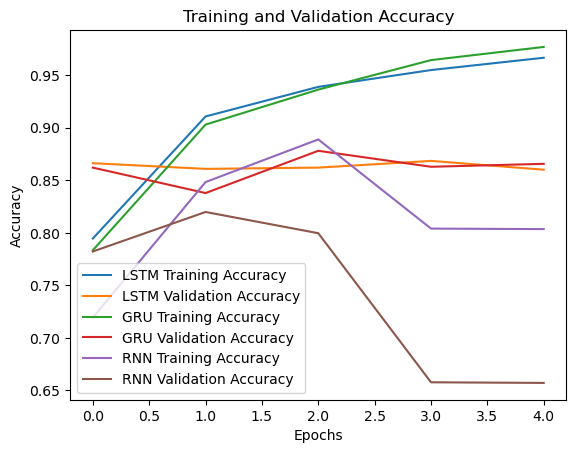

In [27]:
plt.plot(LSTM_history.history['accuracy'], label='LSTM Training Accuracy')
plt.plot(LSTM_history.history['val_accuracy'], label='LSTM Validation Accuracy')

plt.plot(GRU_history.history['accuracy'], label='GRU Training Accuracy')
plt.plot(GRU_history.history['val_accuracy'], label='GRU Validation Accuracy')

plt.plot(RNN_history.history['accuracy'], label='RNN Training Accuracy')
plt.plot(RNN_history.history['val_accuracy'], label='RNN Validation Accuracy')


plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.show()

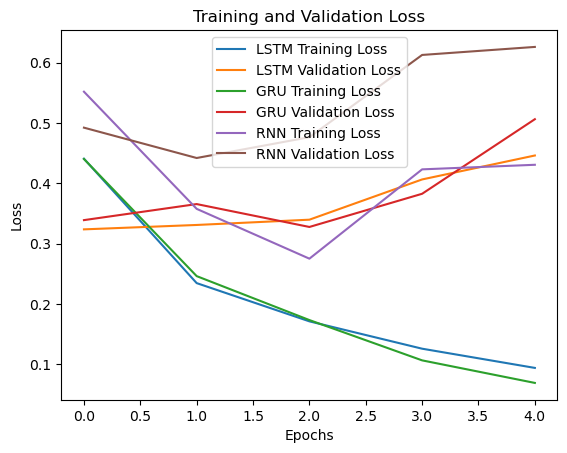

In [28]:
plt.plot(LSTM_history.history['loss'], label='LSTM Training Loss')
plt.plot(LSTM_history.history['val_loss'], label='LSTM Validation Loss')

plt.plot(GRU_history.history['loss'], label='GRU Training Loss')
plt.plot(GRU_history.history['val_loss'], label='GRU Validation Loss')

plt.plot(RNN_history.history['loss'], label='RNN Training Loss')
plt.plot(RNN_history.history['val_loss'], label='RNN Validation Loss')


plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')

plt.show()